## Setup

In [74]:
library(tidyverse)
data_dir = "../data/"
output_dir = "../output/"

## Load Data

In [75]:
data_quantile = read_csv(paste(data_dir, "quantile_normalized_data.csv", sep=""), col_types = cols())
data_tss = read_csv(paste(data_dir, "after_tss_df.csv", sep=""), col_types = cols())
head(data_quantile)
head(data_tss)

A1BG,AAK1,AARS,ABCF1,ABCF3,ABI1,ABL2,ABT1,ACAT2,ACPP,...,ZNHIT3,ZNRD1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN21,ZSCAN26,ZSCAN9,Case_ID,Sample_Status
68.33067,122.1374,77.78989,117.0266,116.5594,129.5168,90.61702,86.48138,119.25089,98.35239,...,74.47961,106.20745,82.23404,87.98582,60.32092,84.51418,108.3307,117.87057,Case028336,ACPA_positive
83.68262,105.0257,98.80585,113.7531,203.5727,187.2979,86.39982,65.45745,78.47429,79.94592,...,58.25975,96.01463,60.59220,113.75310,83.68262,87.59530,106.8360,97.91002,Case028397,ACPA_positive
86.99645,111.5239,100.63519,132.9246,137.6152,230.6259,99.29699,75.75355,84.41046,79.42243,...,57.43883,99.29699,72.00133,118.22074,79.42243,99.29699,109.5541,105.68218,Ctrl028355,control
85.91312,116.2881,97.37323,135.5120,156.6512,178.7748,94.38830,76.68174,94.38830,71.90248,...,57.57270,113.92021,77.74113,117.56294,90.51020,89.25266,105.9304,126.01330,Case028301,ACPA_negative
93.52172,111.9823,99.16223,139.4118,149.7323,173.4388,93.52172,78.39096,91.73936,73.34796,...,58.74823,110.13209,74.77349,103.11879,96.51330,375.30319,106.4761,110.76064,Case028326,ACPA_positive
78.73005,125.1613,96.63830,141.1848,139.7314,174.7420,106.81782,72.44681,97.32890,83.26241,...,62.01906,118.44326,119.02305,92.40293,71.87012,85.94415,109.1002,112.11791,Case028323,ACPA_positive


A1BG,AAK1,AARS,ABCF1,ABCF3,ABI1,ABL2,ABT1,ACAT2,ACPP,...,ZNHIT3,ZNRD1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN21,ZSCAN26,ZSCAN9,Case_ID,Sample_Status
0.000320806,0.000724980,0.000379902,0.000683823,0.000680658,0.000781965,0.000468546,0.000438998,0.000705984,0.000538194,...,0.000357741,0.000604677,0.000411560,0.000449551,0.000270152,0.000427390,0.000623672,0.000690155,Case028336,ACPA_positive
0.000513080,0.000616363,0.000589709,0.000646348,0.001022829,0.000922878,0.000529739,0.000413130,0.000486427,0.000493090,...,0.000376481,0.000579714,0.000389808,0.000646348,0.000513080,0.000536402,0.000623026,0.000586377,Case028397,ACPA_positive
0.000525904,0.000645281,0.000596885,0.000745300,0.000764658,0.001277657,0.000590432,0.000467829,0.000512999,0.000487187,...,0.000371037,0.000590432,0.000451697,0.000677545,0.000487187,0.000590432,0.000635602,0.000619470,Ctrl028355,control
0.000537882,0.000671537,0.000593300,0.000746514,0.000814972,0.000906249,0.000580260,0.000492243,0.000580260,0.000469424,...,0.000381407,0.000661757,0.000498763,0.000678057,0.000560701,0.000554181,0.000629158,0.000707396,Case028301,ACPA_negative
0.000562503,0.000654664,0.000591105,0.000769072,0.000813564,0.000924793,0.000562503,0.000489409,0.000552969,0.000467163,...,0.000384536,0.000645131,0.000473519,0.000613351,0.000578393,0.001563568,0.000629241,0.000648309,Case028326,ACPA_positive
0.000474298,0.000698024,0.000563789,0.000763650,0.000757684,0.000897886,0.000614500,0.000444468,0.000566772,0.000495179,...,0.000381825,0.000665211,0.000668194,0.000542908,0.000441485,0.000507111,0.000623449,0.000638364,Case028323,ACPA_positive


## Extract X and y

In [76]:
get_x = function(df) {
    n = dim(df)[2] - 2 # num_features
    X = df[, 1:n]
    return(X)
}

get_y = function(df) {
    last_column = dim(df)[2]
    y = df[, last_column]
    return(y)
}

In [78]:
X_quantile = get_x(data_quantile)
X_tss = get_x(data_tss)
y = get_y(data_quantile) # y is the same for both 
head(y)

Sample_Status
ACPA_positive
ACPA_positive
control
ACPA_negative
ACPA_positive
ACPA_positive


## Data Transformations

In [79]:
X_tss_sqrt = sqrt(X_tss)
X_tss_asin = asin(X_tss)
head(X_tss_sqrt)

A1BG,AAK1,AARS,ABCF1,ABCF3,ABI1,ABL2,ABT1,ACAT2,ACPP,...,ZNF645,ZNF70,ZNHIT3,ZNRD1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN21,ZSCAN26,ZSCAN9
0.01791106,0.02692545,0.01949107,0.02615001,0.02608942,0.02796364,0.02164592,0.02095228,0.02657036,0.02319901,...,0.02171893,0.02715958,0.01891404,0.02459018,0.02028694,0.02120262,0.01643630,0.02067341,0.02497343,0.02627080
0.02265127,0.02482666,0.02428392,0.02542338,0.03198170,0.03037891,0.02301606,0.02032560,0.02205509,0.02220563,...,0.02182732,0.02159715,0.01940312,0.02407725,0.01974356,0.02542338,0.02265127,0.02316035,0.02496049,0.02421522
0.02293260,0.02540238,0.02443123,0.02730018,0.02765245,0.03574433,0.02429881,0.02162936,0.02264948,0.02207231,...,0.02264948,0.02272059,0.01926232,0.02429881,0.02125316,0.02602969,0.02207231,0.02429881,0.02521115,0.02488915
0.02319228,0.02591403,0.02435775,0.02732241,0.02854771,0.03010397,0.02408859,0.02218655,0.02408859,0.02166619,...,0.02290943,0.02381640,0.01952964,0.02572464,0.02233300,0.02603953,0.02367913,0.02354105,0.02508302,0.02659692
0.02371715,0.02558640,0.02431265,0.02773215,0.02852304,0.03041041,0.02371715,0.02212259,0.02351529,0.02161395,...,0.02337976,0.02331169,0.01960959,0.02539943,0.02176049,0.02476592,0.02404980,0.03954198,0.02508468,0.02546191
0.02177838,0.02642014,0.02374424,0.02763422,0.02752606,0.02996475,0.02478911,0.02108241,0.02380697,0.02225262,...,0.02310755,0.02310755,0.01954034,0.02579168,0.02584945,0.02330039,0.02101154,0.02251913,0.02496896,0.02526587


## Principal Component Analysis

In [80]:
plot_pca = function(X, y, title, xlim = NULL, ylim = NULL) {
    filename = paste(title, ".png", sep="")
    filename = gsub(" ", "_", filename)
    
    # calculate pca
    pca = prcomp(x = X, center = TRUE, scale. = TRUE)
    principal_components = pca$x
    
    # Calculate explained variance
    # https://stats.stackexchange.com/questions/254592/calculating-pca-variance-explained
    eigs <- pca$sdev^2
    explained1 = round((eigs[1] / sum(eigs)) * 100, 1)
    explained2 = round((eigs[2] / sum(eigs)) * 100, 1)
    
    # create dataframe
    df = as.data.frame(principal_components)
    df['Sample_Status'] = y
    
    # plot
    location = paste(output_dir, filename, sep="")
    print(location)
    png(location, units="in", width=6, height=5, res=300)
        g = ggplot(df, aes(x = PC1, y = PC2, color=Sample_Status)) + 
            geom_point() +
            ggtitle(title) + 
            theme(plot.title = element_text(hjust = 0.5, size=14, face="bold"), 
                 panel.border = element_rect(colour = "black", fill=NA, size=1)) + 
            stat_ellipse(geom='Polygon', level = 0.95, alpha = 0.2, aes(fill = Sample_Status)) + 
            coord_fixed(xlim = xlim, ylim = ylim) + 
            xlab(paste("PC1", " (", explained1, "%)", sep="") ) +
            ylab(paste("PC2", " (", explained2, "%)", sep=""))
        print(g)
    dev.off()
    return(g)
}

[1] "../output/PCA_Quantile_Normalized.png"


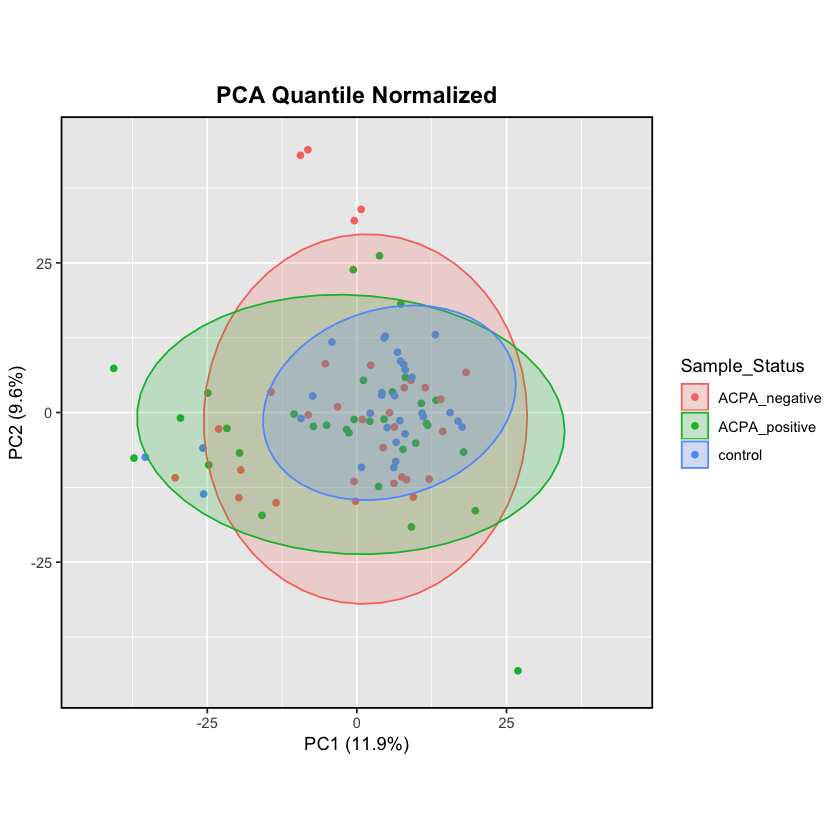

In [84]:
plot_pca(X_quantile, y, "PCA Quantile Normalized", xlim=c(-45, 45), ylim = c(-45, 45))

[1] "../output/PCA_TSS_Sqrt.png"


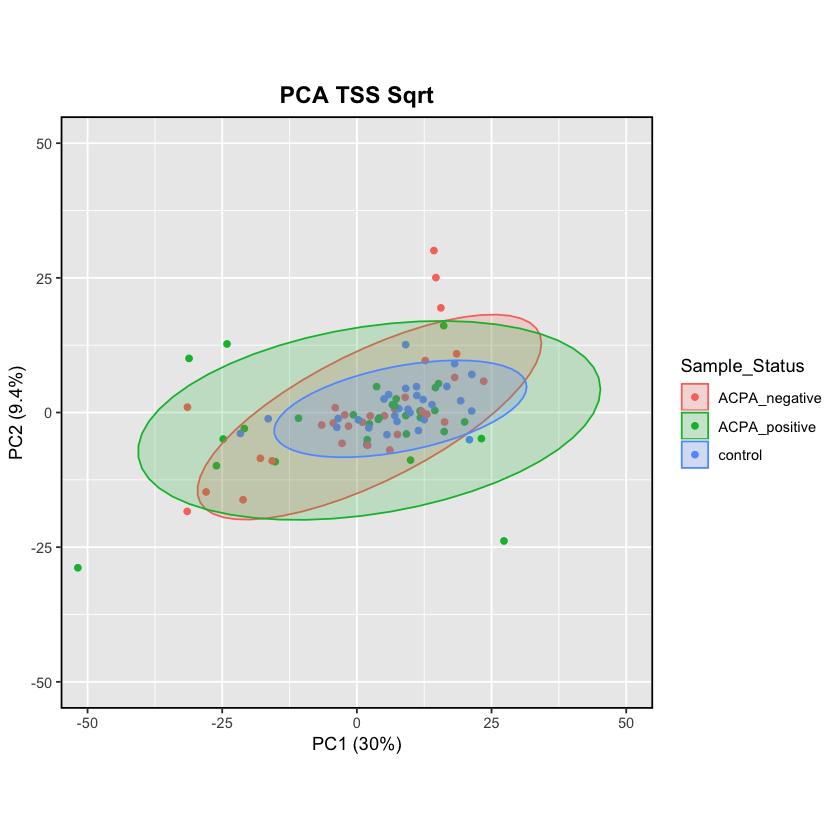

In [93]:
plot_pca(X_tss_sqrt, y, "PCA TSS Sqrt", xlim = c(-50, 50), ylim = c(-50, 50))

[1] "../output/PCA_TSS_asin.png"


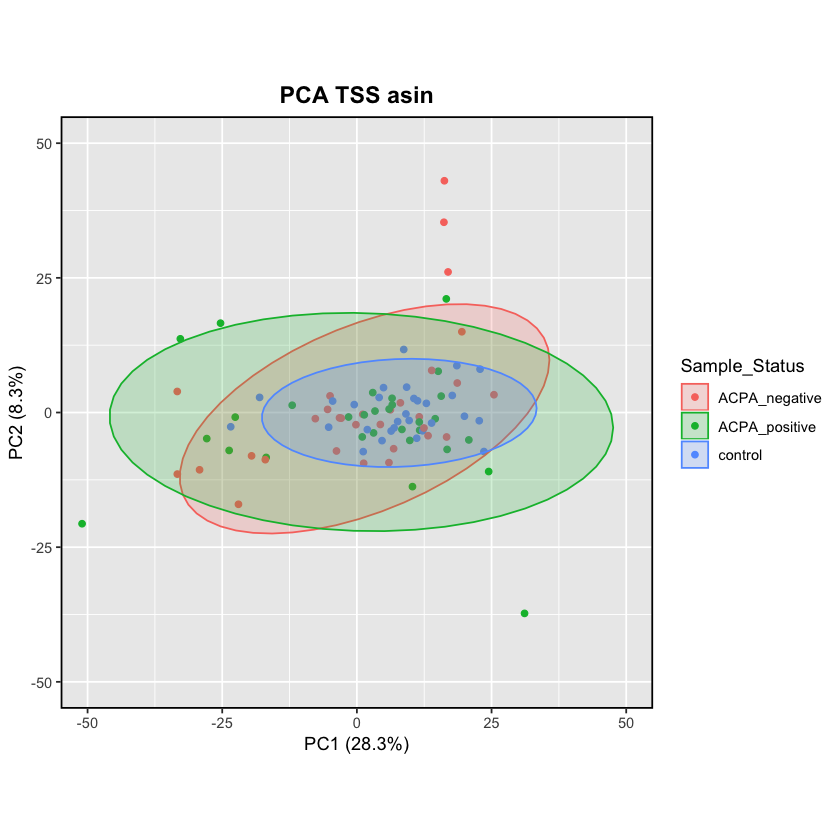

In [94]:
plot_pca(X_tss_asin, y, "PCA TSS asin", xlim=c(50, -50), ylim=c(50, -50))

## Multidimensional Scaling

In [95]:
plot_mds = function(X, y, metric, title, xlim = NULL, ylim = NULL) {
    filename = paste(title, ".png", sep="")
    filename = gsub(" ", "_", filename)
    
    # calculate distances with metric
    distances = dist(scale(X, center=TRUE, scale=TRUE),
      method=metric)
    
    # Multidimensional scaling: 2 dimensions
    mds = cmdscale(distances, eig=TRUE, x.ret=TRUE)
    
    # extract points
    mds_plot = data.frame(mds$points)
    names(mds_plot) = c('MDS1', 'MDS2')
    
    # calculate explained variances
    explained_variances = round(mds$eig/sum(mds$eig)*100, 1)
    explained1 = explained_variances[1]
    explained2 = explained_variances[2]
    
    # dataframe for plots
    df = as.data.frame(mds_plot)
    df['Sample_Status'] = y
    
    location = paste(output_dir, filename, sep="")
    print(location)
    png(location, units="in", width=6, height=5, res=300)
        g = ggplot(df, aes(x = MDS1, y = MDS2, color=Sample_Status)) + 
            geom_point() +
            ggtitle(title) +
            theme(plot.title = element_text(hjust = 0.5, size=14, face="bold"), 
                 panel.border = element_rect(colour = "black", fill=NA, size=1)) + 
            stat_ellipse(geom='Polygon', level = 0.95, alpha = 0.2, aes(fill = Sample_Status)) + 
            coord_fixed(xlim = xlim, ylim = ylim) +
            xlab(paste("MDS1", " (", explained1, "%)", sep="") ) +
            ylab(paste("MDS2", " (", explained2, "%)", sep=""))
        print(g)
    dev.off()
    return(g)
}

[1] "../output/MDS_Quantile_Normalized_(Manhatten).png"


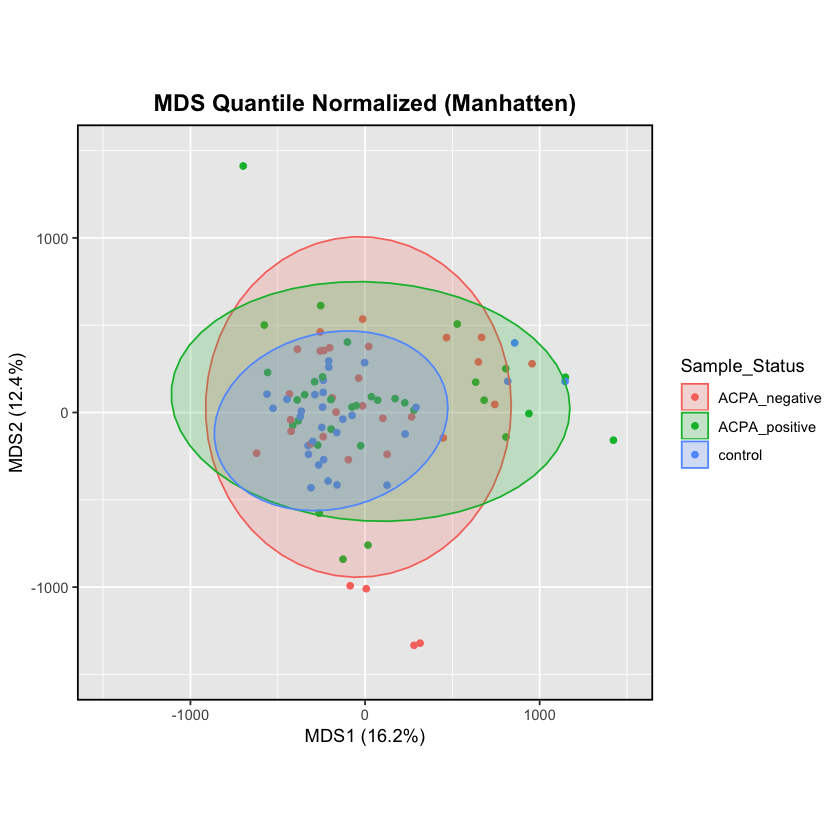

In [96]:
plot_mds(X_quantile, y, "manhattan", "MDS Quantile Normalized (Manhatten)", xlim = c(-1500, 1500), 
        ylim = c(-1500, 1500))

[1] "../output/MDS_TSS_Sqrt_(Manhatten).png"


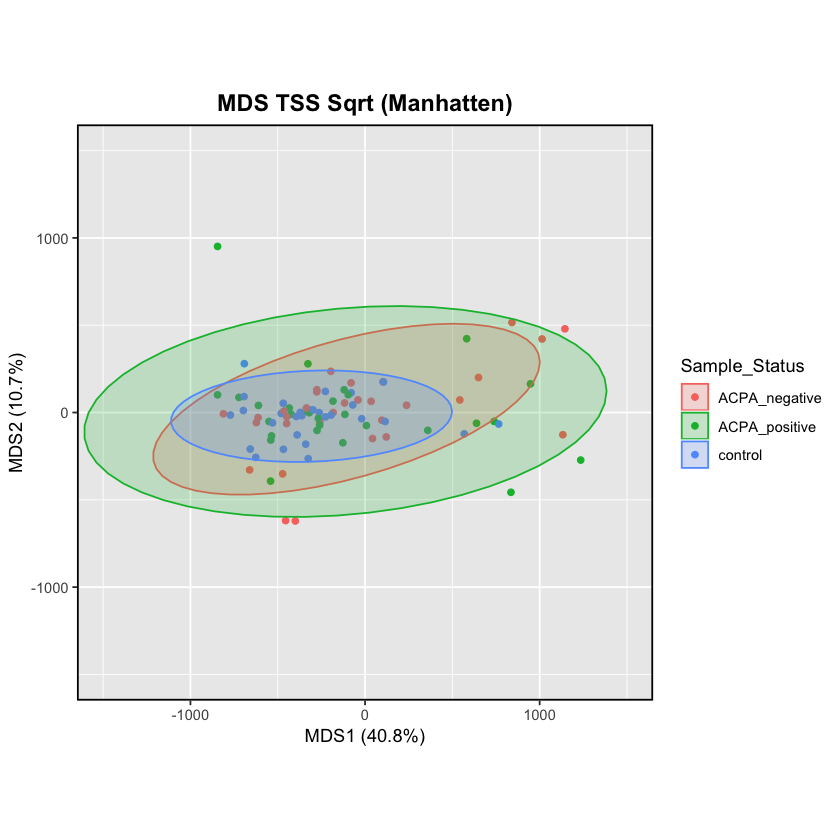

In [97]:
plot_mds(X_tss_sqrt, y, "manhattan", "MDS TSS Sqrt (Manhatten)", xlim = c(-1500, 1500), 
        ylim = c(-1500, 1500))

[1] "../output/MDS_TSS_asin_(Manhatten).png"


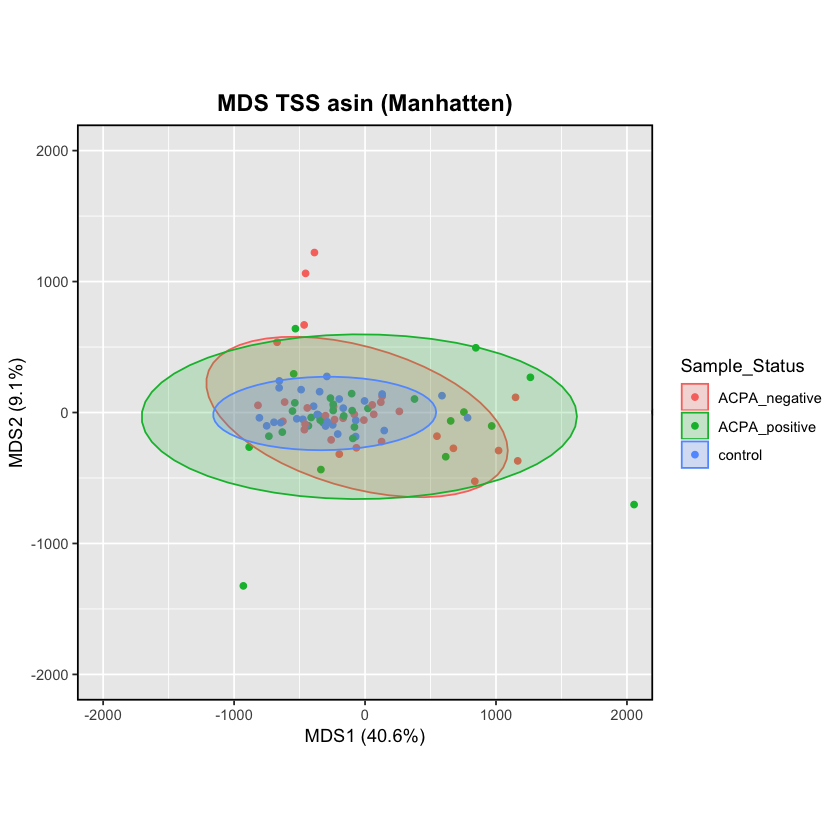

In [98]:
plot_mds(X_tss_asin, y, "manhattan", "MDS TSS asin (Manhatten)", xlim = c(-2000, 2000), ylim = c(-2000, 2000))